## EDA PROJECT
### 1. 데이터 수집 

### 1. 데이터 수집 
- weekly data
- Index(지수) Data(96.07.01 ~ 20.06.29)
    - SP_Index(주식), Interm_Index(중기채), Long_Index(장기채), Commodity_Index(원자재), Gold_Index(금)
- ETF(상품) Data(06.06.26 ~ 20.06.29)
    - SPY(주식 ETF), IEF(중기채 ETF), TLT(장기채 ETF), DBC(원자재 ETF), GLD(금 ETF)

In [2]:
import pandas as pd
# Index Data 수집

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

# ETF(상품) data 수집

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

### 2. 데이터 전처리

In [3]:
# index df

closes_df = pd.DataFrame({'Date' : sp_index["Date"].copy(),
                          'SP_Close' : sp_index["Close"].copy(),
                          'Long_Close' : long_index["Close"].copy(),
                          'Interm_Close' : interm_index["Close"].copy(),
                          'Commodity_Close' : commodity_index["Close"].copy(),
                          'Gold_Close' : gold_index["Close"].copy()}).round(2)

closes_df = closes_df.set_index('Date')

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,657.44,9.41,10.07,207.88,382
1996.7.8,646.19,9.58,10.18,210.44,384
1996.7.15,638.73,9.64,10.22,198.54,385
1996.7.22,635.90,9.60,10.19,193.01,386
1996.7.29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020.6.1,3193.93,14.93,12.03,325.54,1683
2020.6.8,3041.31,15.51,12.12,314.28,1737
2020.6.15,3097.74,15.51,12.13,327.64,1753


In [4]:
# 수익률 df

index_return = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0] 
index_return

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,0.000000,0.000000,0.000000,0.000000,0.000000
1996.7.8,-0.017112,0.018066,0.010924,0.012315,0.005236
1996.7.15,-0.028459,0.024442,0.014896,-0.044930,0.007853
1996.7.22,-0.032763,0.020191,0.011917,-0.071532,0.010471
1996.7.29,0.007681,0.048884,0.030785,-0.035597,0.015707
...,...,...,...,...,...
2020.6.1,3.858132,0.586610,0.194638,0.566000,3.405759
2020.6.8,3.625989,0.648247,0.203575,0.511834,3.547120
2020.6.15,3.711822,0.648247,0.204568,0.576102,3.589005


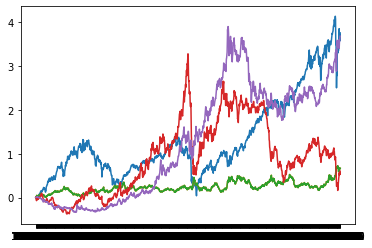

In [27]:
from matplotlib import pyplot as plt

x_values = index_return.index
y_values_1 = index_return.SP_Close
y_values_2 = index_return.Long_Close
y_values_3 = index_return.Long_Close
y_values_4 = index_return.Commodity_Close
y_values_5 = index_return.Gold_Close

plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)
plt.plot(x_values, y_values_4)
plt.plot(x_values, y_values_5)

plt.show()

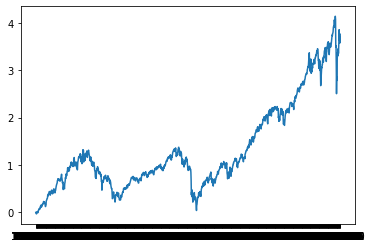

In [29]:
# 코드 깔끔한데 5개 동시에 돌리면 에러남
# 그래프 크기 크게 하기.
# http://hleecaster.com/python-matplotlib-line-graph/
# x 축 설정
# 라벨이 안나옴 ... 왜??
from matplotlib import pyplot as plt
plt.plot(index_return.index,index_return.SP_Close, label = "주식")

plt.show()

#### Index 추종 포트폴리오 구성
- Portfolio_1 : 주식 100%
- Portfolio_2 : 주식 60% + 장기채 40%
- All_Weather : 주식 30% + 장기채 40% + 중기채 15% + 원자재 7.5% + 금 7.5%

### 포트폴리오 구성
- index df에 가중치를 주어 index 포트폴리오를 구성한다.
- 96.07.01일 기준 $ 1,000 를 투자한다고 가정

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def port_return(sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight): 
       
    portfolio_return = (closes_df * 
                          [sp_index_weight, long_index_weight,interm_index_weight,
                           commodity_index_weight, gold_index_weight]).sum(axis=1)

In [8]:
result1 = port_return(1, 0, 0, 0, 0)
result2 = port_return(0.6, 0.4, 0, 0, 0)
result3 = port_return(0.3, 0.4, 0.15, 0.075, 0.075)
# port_return 함수 다시 설정하고 $1000부터 시작하도록 하기

In [276]:
# 참고자료

# def port_return(sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight): 
    
#     pct_return = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0]
#     pct_return.columns = ["Stock100%", "Stock 60% + Bond 40%", "All Weather"] 
   
#     portfolio_return = (pct_return * 
#                           [sp_index_weight, long_index_weight,interm_index_weight,
#                            commodity_index_weight, gold_index_weight]).sum(axis=1)

#     portfolio_return.plot(label='Portfolio'); 
    
#     plt.legend()

In [278]:
# Portfolio_1 = sp_index
# Portfolio_2 = sp_index*0.6 + long_index*0.4
# Portfolio_3 = sp_index*0.3 + long_index*0.4 + interm_index*0.15 + commodity_index*0.075 + gold_index*0.075 

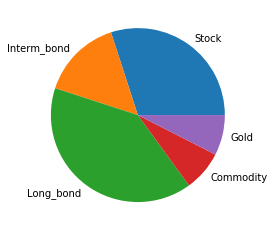

In [9]:
# 원 그래프
labels_3 = ["Stock", "Interm_bond", "Long_bond", "Commodity", "Gold"]
# ratio_2 = [60, 40]
ratio_3 = [30, 15, 40, 7.5, 7.5]

plt.pie(ratio_3, labels = labels_3)
plt.show()

### 3. 데이터 분석


In [26]:
# # (움직이는 그래프로)30년 백테스팅 추이 그래프 - 원점을 어떻게 설정할 것인가? 
# 1000으로 잡고 비율(x) 조정해서 전체에다가 곱하기로 그래프 그리기 

In [25]:
# back testing 
# train_test_spilt 로 트레인 시킬것
# 트러블 슈팅 때 질문

In [241]:
# 변동성 정의 다시 말해주기 마이너스 폭



In [242]:
# DCT

#### 1) 기대수익률 (return)

In [41]:
# 각 자산별 기대 수익률
# https://m.blog.naver.com/PostView.nhn?blogId=anthouse28&logNo=221640874003&proxyReferer=https:%2F%2Fwww.google.com%2F


import numpy as np
closes_df

# 각 자산별 weekly 로그 수익률 계산 
logret_df = np.log(closes_df/closes_df.shift(1))
logret_df = logret_df.dropna()
logret_df.columns = ["주식", "중기채","장기채","원자재","금"]
logret_df.head()

# 각 자산별 weekly 평균 로그 수익률 계산
week_mprofit = logret_df.mean()
week_mprofit

# 각 자산별 yearly 평균 로그 수익률 계산 
# 거래일 252 일 / 5 = 50.4주
# 벡터로 형변환 
year_mprofit = week_mprofit * 50.4
year_mprofit = year_mprofit.values
year_mprofit

# 각 자산별 년간 평균 6.3%, 2%, 0.8%, 1.9%, 6.2% 의 로그 수익률 예상 (소수점 넷째자리에서 반올림)

array([0.06281635, 0.02065759, 0.00759185, 0.01895076, 0.06217678])

In [43]:
# 포트폴리오별 기대 수익률

# 포트폴리오별 가중치
s = np.array([1, 0, 0, 0, 0])
s_6 = np.array([0.6, 0.4, 0, 0, 0])
aw = np.array([0.3, 0.4, 0.15, 0.075, 0.075])

# 가중치 * 자산별 년간 평균 로그 수익률 계산
s_return = s.dot(year_mprofit)
s_6_return = s_6.dot(year_mprofit)
aw_return = aw.dot(year_mprofit)


s_return,s_6_return,aw_return
# 년간 6.3%, 4.6%, 3.4% 로그 수익률 예상

# (10년 후 예상~~)

(0.06281635291806839, 0.04595284881267813, 0.034331286297367127)

#### 2) RISK 
##### 2-1) 변동성

In [45]:
#변동성(기대 수익률 표준편차) 분석 
# 변동성이 적으면 안정적이다 ! 라는 결론 도출

# 자산별 로그 수익률
logret_df.head()
# 자산별 risk : 자산별 weekly 기대 수익률의 표준편차 
logret_df.std()

주식     0.025132
중기채    0.015287
장기채    0.006643
원자재    0.031062
금      0.023682
dtype: float64

In [76]:
# 포트폴리오별 risk
# 주별 로그 기대수익률 데이터 프레임 사용해 공분산 행렬
logret_df.cov()
# 년간 환산을 위해 * 50.4 
cov_mat = logret_df.cov()*50.4
# 행렬로 타입 변환
cov_mat = cov_mat.values  
cov_mat

#포트폴리오 년간 risk 계산 (분산으로 / 표준편차로 ?)

s_var = np.dot(np.dot(s,cov_mat), s.T)
s_risk = np.sqrt(s_var)
s_6_var = np.dot(np.dot(s_6,cov_mat), s_6.T)
s_6_risk = np.sqrt(s_6_var)
aw_var = np.dot(np.dot(aw,cov_mat), aw.T)
aw_risk = np.sqrt(aw_var)

print("주식 100% 포트폴리오 위험도 : ", s_risk)
print("주식 60%, 채권 40% 포트폴리오 위험도 : ", s_6_risk)
print("all weather 포트폴리오 위험도 : ", aw_risk)

주식 100% 포트폴리오 위험도 :  0.1784217280957842
주식 60%, 채권 40% 포트폴리오 위험도 :  0.10476659319704153
all weather 포트폴리오 위험도 :  0.07049222437405185


In [53]:
week_mprofit = logret_df.mean()
week_mprofit

주식     0.001246
중기채    0.000410
장기채    0.000151
원자재    0.000376
금      0.001234
dtype: float64

No handles with labels found to put in legend.


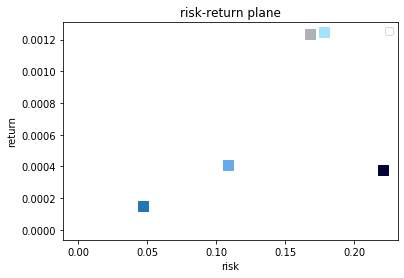

In [73]:
plt.figure()
## 주당 수익률이라 y축 단위 조정 필요할듯(년단위로)

# 주식 
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[0][0]),week_mprofit[0], marker = 's', color = '#A1E2FF', markeredgewidth = 1, markersize = 10);

# 중기채 
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[1][1]),week_mprofit[1], marker = 's', color = '#65ABEC', markeredgewidth = 1, markersize = 10);

# 장기채
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[2][2]),week_mprofit[2], marker = 's', color = '#1F77B4', markeredgewidth = 1, markersize = 10);

# 원자재
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[3][3]),week_mprofit[3], marker = 's', color = '#000536', markeredgewidth = 1, markersize = 10);

# 금
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[4][4]),week_mprofit[4], marker = 's', color = '#AFB2B4', markeredgewidth = 1, markersize = 10);


plt.plot(0,0)
plt.title("risk-return plane")
plt.xlabel('risk')
plt.ylabel('return')
plt.legend();
# LEBEL 붙이기

No handles with labels found to put in legend.


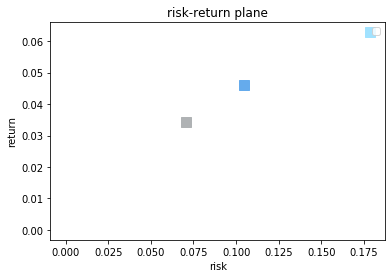

In [79]:
# 포트폴리오별 년간 risk - return 

# 주식 100%  
plt.plot(s_risk, s_return, marker = 's', color = '#A1E2FF', markeredgewidth = 1, markersize = 10);

# 주식 60% + 채권 40%   
plt.plot(s_6_risk, s_6_return, marker = 's', color = '#65ABEC', markeredgewidth = 1, markersize = 10);

# all weather 
plt.plot(aw_risk, aw_return, marker = 's', color = '#AFB2B4', markeredgewidth = 1, markersize = 10);

plt.plot(0,0)
plt.title("risk-return plane")
plt.xlabel('risk')
plt.ylabel('return')
plt.legend();

##### 2-2) 돈 잃을 가능성

In [ ]:
# 포트폴리오 최악의 해(년단위), 최대 낙폭(주단위), mdd


In [ ]:
#  지수와 상품간 correlation 
# 마지막에 상관관계 적용해서 99% 구하기 
# 상관계수함수 쓰기

# (마지막에 신뢰도 수정)

### 4. 데이터 시각화

In [ ]:
# dataframe으로 포트폴리오 3개 비교하기 
# no, 포트폴리오명, 최초금액, 최종금액, 30년간 수익률, 최고의 해, 최악의 해, 최대 낙폭, 상관관계
# 상관관계 : 시장(s&p 500)과 포트폴리오와의 관계 -> 자산배분 잘되있다.

In [ ]:
# 상관관계 할때 hitmap 

In [ ]:
# 진짜 올웨더가 최선일까?
# 움직이는 거..
#https://m.blog.naver.com/anthouse28/221611131960

In [ ]:
# 당신은 어떤 투자 성향입니까 ?
# 공격, 안정 - 포트폴리오 퍼센트 정의 
# 입력하면, 쫙